<a href="https://colab.research.google.com/github/jtianesq/havardsfa/blob/master/SFAv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

**Load data set from Github folder**

In [2]:
# load dataset
url = "https://raw.githubusercontent.com/jtianesq/havardsfa/master/all_combined_data_raw.csv"
dataframe = pd.read_csv(url,sep="|",header=0,encoding='windows-1252') #the encoding part is necessary!!!
print(dataframe.head(5))

    Score          Industry              URLtrim  Year Founded  \
0  Accept  cleaning_service           psi-ky.com          1994   
1  Reject  cleaning_service  puritancleaning.com          1981   
2  Accept  cleaning_service       pviwashing.com          1989   
3  Accept  cleaning_service             qpct.com          2004   
4  Accept  cleaning_service  qvestsanitation.com          2009   

   Recurring Revenue Margins Stable Cash Flow Industry Growth  \
0               4.10  medium           medium             low   
1               1.00     low           medium             low   
2               3.50  medium           medium             low   
3               1.60  medium           medium             low   
4               0.33  medium           medium             low   

  Fragmented Industry Straightforward Operations Exogenous Risk  \
0              medium                         no            low   
1              medium                        yes            low   
2          

In [3]:
print(dataframe.columns)
print(dataframe.shape)

Index(['Score', 'Industry', 'URLtrim', 'Year Founded', 'Recurring Revenue',
       'Margins', 'Stable Cash Flow', 'Industry Growth', 'Fragmented Industry',
       'Straightforward Operations', 'Exogenous Risk', 'Barriers to Entry',
       'Employee Estimate', 'Stickiness', 'Supplier Power', 'Customer Power',
       'Service vs Project/Product', 'Longterm Relationships',
       'Customer Concentration'],
      dtype='object')
(413, 19)


**Print out unique values for each column**

In [4]:
cols = ['Industry','Year Founded','Recurring Revenue', 'Margins', 'Stable Cash Flow',
       'Industry Growth', 'Fragmented Industry', 'Straightforward Operations',
       'Exogenous Risk', 'Barriers to Entry', 'Employee Estimate',
       'Stickiness', 'Supplier Power', 'Customer Power',
       'Service vs Project/Product', 'Longterm Relationships',
       'Customer Concentration']
for col in dataframe[cols].columns.values:
    print(col, dataframe[col].unique())

Industry ['cleaning_service' 'lab_equipment' 'PT_OT_Speech_Therapy' 'CMMS_service'
 'septic_service' 'distributor' 'manufacturer' 'IT_service'
 'medical_equipment' 'medical_service' 'HR_service' 'investment'
 'news_service' 'marketing_service' 'education' 'construction'
 'inspection_testing_services' 'repairement_service'
 'scan_surveying_services']
Year Founded [1994 1981 1989 2004 2009 1997 1925 1969 1966 1886 1965 2007 1987 1993
 2013 2000 2008 2002 1983 1988 2016 2010 2003 2005 1991 1998 1986 1956
 1980 1978 1917 1924 1945 1973 1996 2006 1923 1967 1990 1968 1985 2011
 2012 2015 1939 2017 2018 1995 1976 1982 1999 1992 1971 1953 2014 1963
 1975 1972 1984 1979 1940 2001 1962 1974 1946 1959 1960 1881 1949 1950
 1970 1873 1977 1954 1928 1936 1958 1948 1918]
Recurring Revenue [4.10e+00 1.00e+00 3.50e+00 1.60e+00 3.30e-01 4.30e+00 2.00e+00 7.30e+00
 1.04e+01 2.50e+00 1.00e+01 3.00e-01 5.00e-01 1.25e+01 2.10e+00 7.70e-01
 2.00e-01 6.10e+00 1.00e+02 6.50e+00 2.00e-02 1.90e+00 2.30e+01 9.90e

**Exploring the data **

In [5]:
dataframe['Score'].value_counts()

Reject    261
Accept    147
reject      5
Name: Score, dtype: int64

In [6]:
#Some records have 'reject' in "Score" column instead of 'Reject'. Fix the inconsistency with the following code.
dataframe['Score']=np.where(dataframe['Score'] =='reject', 'Reject', dataframe['Score'])

#Convert categorical value in "Score" column to numerical values: reject is 0, accept is 1.
dataframe['Score']=np.where(dataframe['Score'] =='Reject', 0, dataframe['Score'])
dataframe['Score']=np.where(dataframe['Score'] =='Accept', 1, dataframe['Score'])
dataframe['Score']=dataframe['Score'].astype(int)
dataframe['Score'].value_counts()

0    266
1    147
Name: Score, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


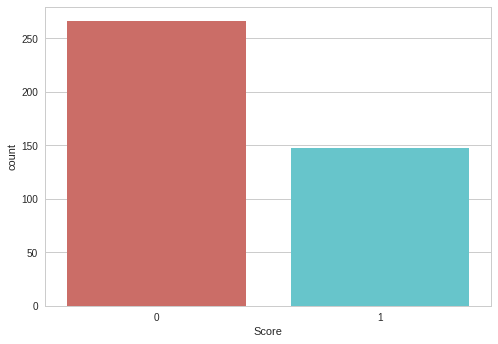

In [7]:
sns.countplot(x='Score',data=dataframe, palette='hls')
plt.show()

The sample is unbalaneced.  As shown in the calculation below, the ratio of reject to accept is 83:16.

In [8]:
count_reject = len(dataframe[dataframe['Score']==0])
count_accept = len(dataframe[dataframe['Score']==1])
pct_of_reject = count_reject/(count_reject + count_accept)
print("percentage of reject is", pct_of_reject*100)
pct_of_accept = count_accept/(count_reject+count_accept)
print("percentage of accept", pct_of_accept*100)

percentage of reject is 64.40677966101694
percentage of accept 35.59322033898305


Most companies in data set were founded between year 2000 and 2018. As a variable, the value is not of normal distribution. Since it reflects what data looks in real life, I chose not to correct the issue.

(array([  3.,   0.,   0.,   6.,   7.,  16.,  33.,  65., 133., 150.]),
 array([1873. , 1887.5, 1902. , 1916.5, 1931. , 1945.5, 1960. , 1974.5,
        1989. , 2003.5, 2018. ]),
 <a list of 10 Patch objects>)

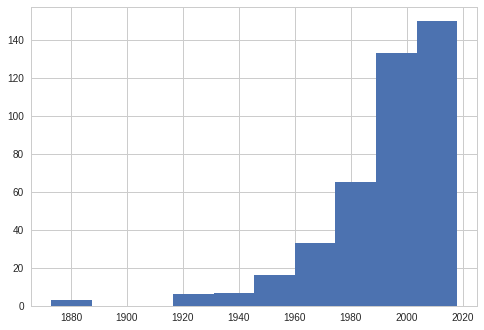

In [9]:
plt.hist(dataframe['Year Founded'])

Most companies in data set had small revenues between 0.5 to 50 million. There are outliner with relatively higher revenue. However, since we did consider and label all the companies during searh fund evaluation process, I chose not to remove the outliers. In future, it may make sense to bucketize the revenue using arbitrary catories instead of using real values as did in this study.

(array([410.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([2.000000e-02, 1.300180e+02, 2.600160e+02, 3.900140e+02,
        5.200120e+02, 6.500100e+02, 7.800080e+02, 9.100060e+02,
        1.040004e+03, 1.170002e+03, 1.300000e+03]),
 <a list of 10 Patch objects>)

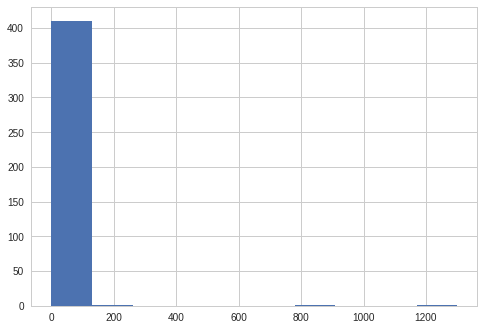

In [10]:
#dataframe=dataframe[dataframe['Recurring Revenue']<=50]
plt.hist(dataframe['Recurring Revenue'])

**Explore categorical variables**

In [24]:
dataframe.groupby('Score').mean()

,Year Founded,Recurring Revenue
Score,,
0,1991.402256,19.022143
1,1993.074830,6.341633


Calculate categorical means for other categorical variables to better understand the distribution of the data

In [21]:
dataframe.groupby('Margins').mean()

,Score,Year Founded,Recurring Revenue
Margins,,,
high,0.915254,1998.033898,29.301017
low,0.136646,1993.639752,5.097826
medium,0.367876,1988.782383,17.837306


In [19]:
dataframe.groupby('Stable Cash Flow').mean()

,Score,Year Founded,Recurring Revenue
Stable Cash Flow,,,
high,0.727273,1990.204545,46.529091
low,0.198864,1994.596591,4.910568
medium,0.414508,1990.036269,15.961503


In [23]:
dataframe.groupby('Industry Growth').mean()

,Score,Year Founded,Recurring Revenue
Industry Growth,,,
high,0.230769,1994.519231,13.619231
low,0.270440,1987.270440,12.356038
medium,0.455446,1995.069307,16.432178


In [22]:
dataframe.groupby('Employee Estimate').mean()

,Score,Year Founded,Recurring Revenue
Employee Estimate,,,
11-50,0.403846,1992.782051,5.528910
2-10,0.401869,1999.476636,1.178505
201-1000,0.043478,1992.043478,75.360870
51-200,0.314961,1984.724409,25.749606


**Convert categorical variables to numerical dummy variables using pandas.get_dummies function.** {sklearn ref: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html}

In [6]:
cat_vars=['Industry','Margins', 'Stable Cash Flow',
       'Industry Growth', 'Fragmented Industry', 'Straightforward Operations',
       'Exogenous Risk', 'Barriers to Entry', 'Employee Estimate',
       'Stickiness', 'Supplier Power', 'Customer Power',
       'Service vs Project/Product', 'Longterm Relationships',
       'Customer Concentration']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dataframe[var], prefix=var)
    dataframe1=dataframe.join(cat_list)
    dataframe=dataframe1
    
cat_vars=['Industry','Margins', 'Stable Cash Flow',
       'Industry Growth', 'Fragmented Industry', 'Straightforward Operations',
       'Exogenous Risk', 'Barriers to Entry', 'Employee Estimate',
       'Stickiness', 'Supplier Power', 'Customer Power',
       'Service vs Project/Product', 'Longterm Relationships',
       'Customer Concentration', 'URLtrim']
dataframe_vars=dataframe.columns.values.tolist()
to_keep=[i for i in dataframe_vars if i not in cat_vars]
dataframe_final=dataframe[to_keep]
dataframe_final.columns.values
print(dataframe_final.shape)

(413, 65)


Compute pairwise correlation of columns and visualize the correlation using heatmap. {doc ref: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html}. Three methods available: 
method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation

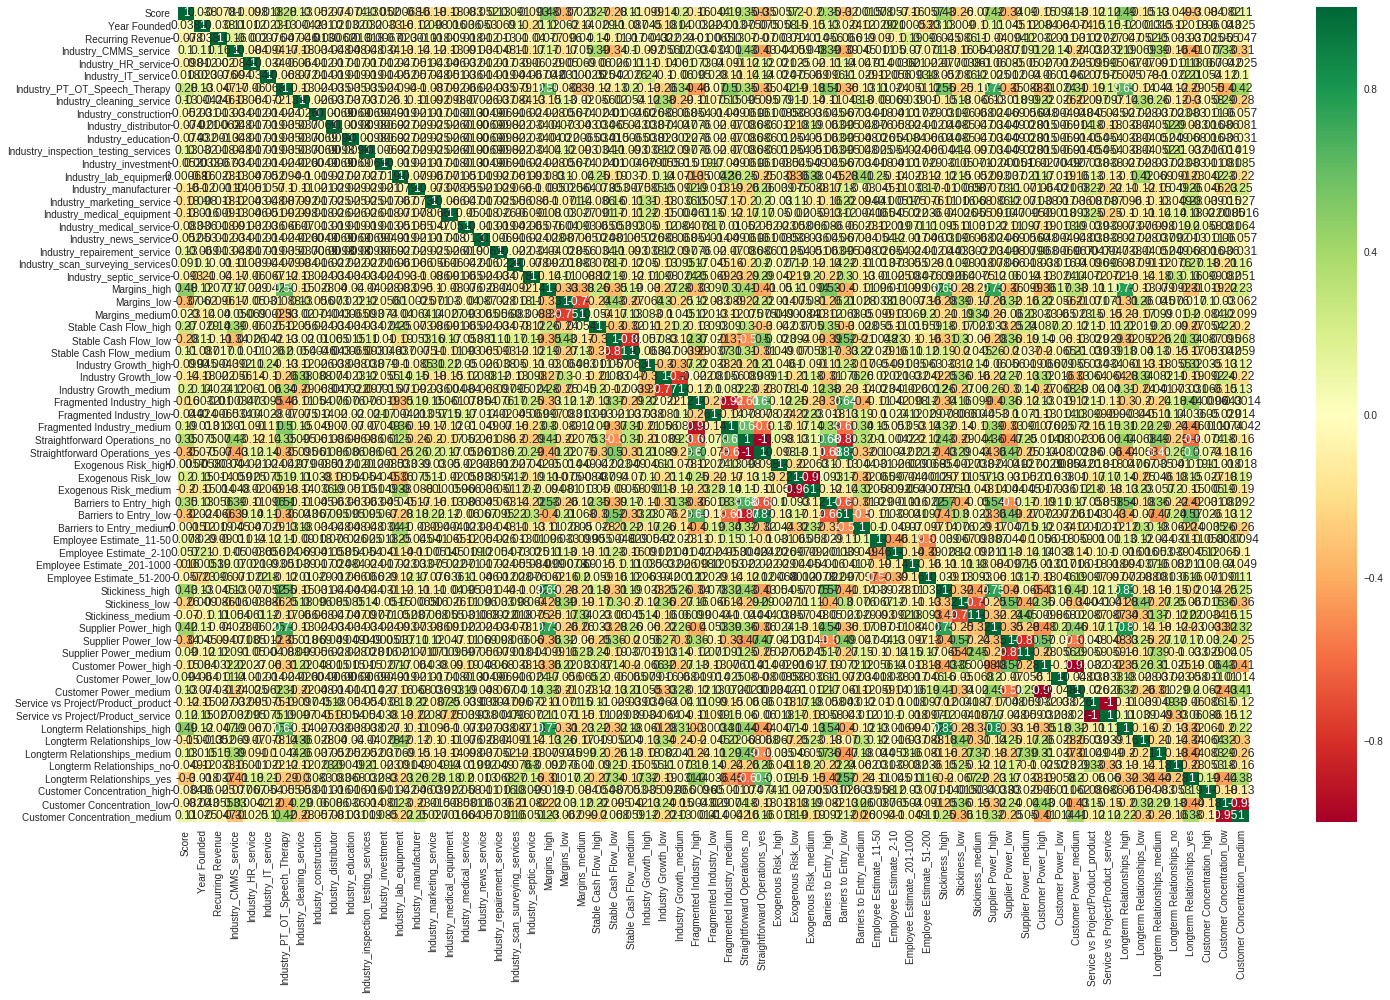

In [7]:
#visualize pairwise correlation
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

plt.subplots(figsize=(24,15))
sns.heatmap(dataframe_final.corr(), annot=True, cmap="RdYlGn")
plt.show()

Oversampling using SMOTE


In [0]:
X = dataframe_final.loc[:, dataframe_final.columns != 'Score']
y = dataframe_final.loc[:, dataframe_final.columns == 'Score']

In [9]:
!pip install imblearn

    100% |████████████████████████████████| 174kB 10.2MB/s 
    100% |████████████████████████████████| 5.4MB 5.7MB/s 
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2


In [10]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Score'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of reject in oversampled data",len(os_data_y[os_data_y['Score']==0]))
print("Number of accept data",len(os_data_y[os_data_y['Score']==1]))
print("Proportion of reject data in oversampled data is ",len(os_data_y[os_data_y['Score']==0])/len(os_data_X))
print("Proportion of accept data in oversampled data is ",len(os_data_y[os_data_y['Score']==1])/len(os_data_X))

length of oversampled data is  374
Number of reject in oversampled data 187
Number of accept data 187
Proportion of reject data in oversampled data is  0.5
Proportion of accept data in oversampled data is  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if n_samples < ensure_min_samples:


In [11]:
data_final_vars=dataframe_final.columns.values.tolist()
y=['Score']
X=[i for i in data_final_vars if i not in y]

print(X)
print(len(X))

['Year Founded', 'Recurring Revenue', 'Industry_CMMS_service', 'Industry_HR_service', 'Industry_IT_service', 'Industry_PT_OT_Speech_Therapy', 'Industry_cleaning_service', 'Industry_construction', 'Industry_distributor', 'Industry_education', 'Industry_inspection_testing_services', 'Industry_investment', 'Industry_lab_equipment', 'Industry_manufacturer', 'Industry_marketing_service', 'Industry_medical_equipment', 'Industry_medical_service', 'Industry_news_service', 'Industry_repairement_service', 'Industry_scan_surveying_services', 'Industry_septic_service', 'Margins_high', 'Margins_low', 'Margins_medium', 'Stable Cash Flow_high', 'Stable Cash Flow_low', 'Stable Cash Flow_medium', 'Industry Growth_high', 'Industry Growth_low', 'Industry Growth_medium', 'Fragmented Industry_high', 'Fragmented Industry_low', 'Fragmented Industry_medium', 'Straightforward Operations_no', 'Straightforward Operations_yes', 'Exogenous Risk_high', 'Exogenous Risk_low', 'Exogenous Risk_medium', 'Barriers to Ent

**Feature ranking with Recursive Feature Elimination (RFE)**

RFE uses an external estimator that assigns weights to features (e.g., the coefficients of a linear model). 
The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. 
That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. There are 64 columns of features to begin with. I use RFE to eliminate and keep the 30 features.

{doc ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html}

Two algorithms, "LogisticRegression" and "SVR" (Epsilon-Support Vector Regression) were used as estimators for RFE. The choice of estimator does impact prediction accurarcy as tested using various classifiers - since the algorisms use different mechanism to rank and select features. In general, classifiers performed slightly better overall when SVR estimator was used.

In [0]:
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, 30) #reduce attributes to 30 dimensions
rfe = rfe.fit(os_data_X.astype(float), os_data_y.values.ravel().astype(int))
print(rfe.support_)
print(rfe.ranking_)

'''
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
rfe = RFE(estimator, 30, step=1)
rfe = rfe.fit(os_data_X.astype(float), os_data_y.values.ravel().astype(int))
print(rfe.support_)
print(rfe.ranking_)
'''

[False False  True  True False  True  True  True False  True False  True
 False  True  True  True  True False  True False  True  True  True  True
 False  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True]
[12 11  1  1  7  1  1  1  9  1  3  1  8  1  1  1  1  4  1  6  1  1  1  1
  5  1  2  1 10  1  1  1  1  1  1  1  1  1  1  1  1]


'\nfrom sklearn.svm import SVR\nestimator = SVR(kernel="linear")\nrfe = RFE(estimator, 30, step=1)\nrfe = rfe.fit(os_data_X.astype(float), os_data_y.values.ravel().astype(int))\nprint(rfe.support_)\nprint(rfe.ranking_)\n'

In [0]:
cols = rfe.get_support().tolist() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(cols, os_data_X.columns.values):
    if bool:
        new_features.append(feature)
        
X=os_data_X[new_features]
y=os_data_y['Score']

print(os_data_y['Score'].unique())

[0 1]


In [0]:
print(X.columns)

Index(['Margins_high', 'Margins_low', 'Stable Cash Flow_high',
       'Stable Cash Flow_low', 'Stable Cash Flow_medium',
       'Industry Growth_low', 'Fragmented Industry_high',
       'Fragmented Industry_medium', 'Straightforward Operations_no',
       'Straightforward Operations_yes', 'Exogenous Risk_high',
       'Exogenous Risk_medium', 'Barriers to Entry_low',
       'Barriers to Entry_medium', 'Employee Estimate_11-50',
       'Employee Estimate_2-10', 'Employee Estimate_51-200', 'Stickiness_low',
       'Supplier Power_high', 'Supplier Power_low', 'Supplier Power_medium',
       'Customer Power_high', 'Customer Power_medium',
       'Service vs Project/Product_product',
       'Service vs Project/Product_service', 'Longterm Relationships_no',
       'Longterm Relationships_yes', 'Customer Concentration_high',
       'Customer Concentration_low', 'Customer Concentration_medium'],
      dtype='object')


In [0]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(int),X.astype(float))
result=logit_model.fit(method='lbfgs',cov_type='HC0')
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                                                      Results: Logit
Model:                                   Logit                               Pseudo R-squared:                    0.475   
Dependent Variable:                      Score                               AIC:                                 245.9772
Date:                                    2018-12-03 15:18                    BIC:                                 332.5165
No. Observations:                        272                                 Log-Likelihood:                      -98.989 
Df Model:                                23                                  LL-Null:                             -188.54 
Df Residuals:                            248                                 Scale:                               1.0000  
Converged:                               0.0000                                                                           
----------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Logistic Regression Model Fitting

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,  
    intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=3,
    penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
    verbose=0, warm_start=False)
logreg.fit(X_train.astype(float), y_train.astype(int))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  self.C = C


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=3,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred = logreg.predict(X_test.astype(float))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[24 13]
 [ 7 38]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.65      0.71        37
          1       0.75      0.84      0.79        45

avg / total       0.76      0.76      0.75        82




Interpretation:
Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer's preferred term deposit were promoted.

ROC curve

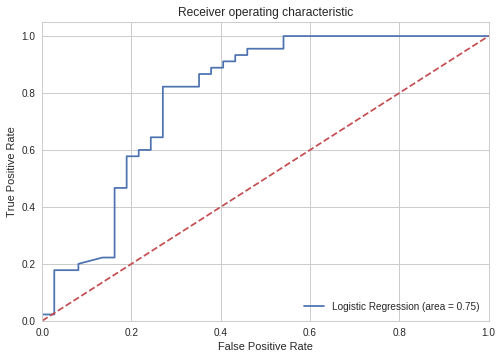

In [0]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Because the sample size is small, I will attemp to add some synthetic features. One technich is to use Mega-Trend Diffusion based on the correlation value between attributes (ref: https://pdfs.semanticscholar.org/f0dd/73d16cf7c28ba552d76432304231d04e6046.pdf)  

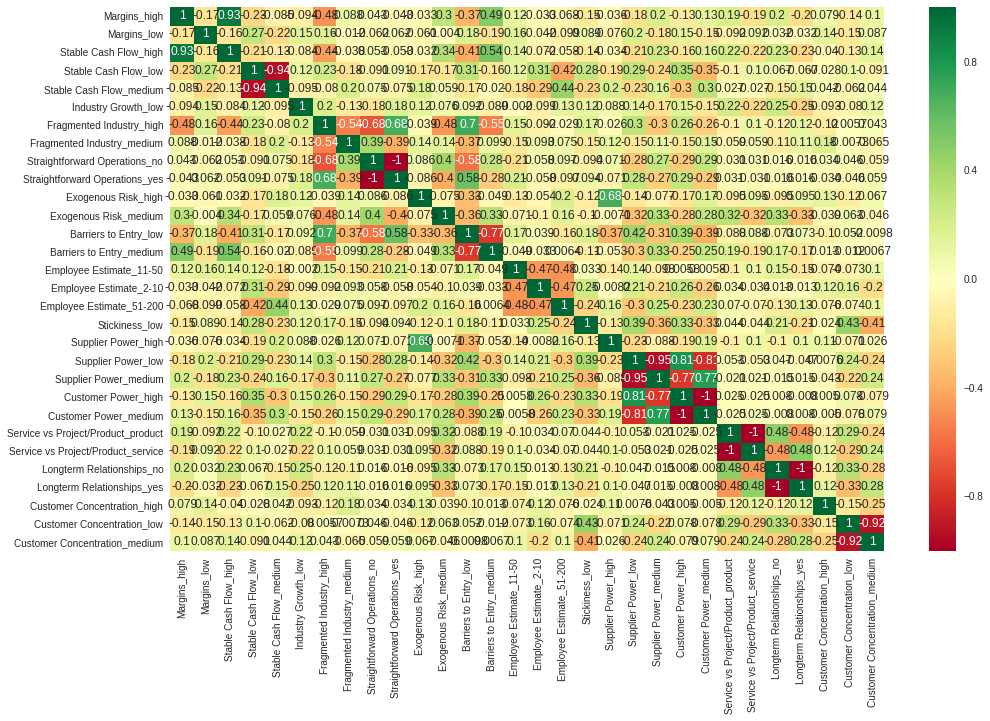

In [0]:
#view attribute correlation
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

plt.subplots(figsize=(16,10))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

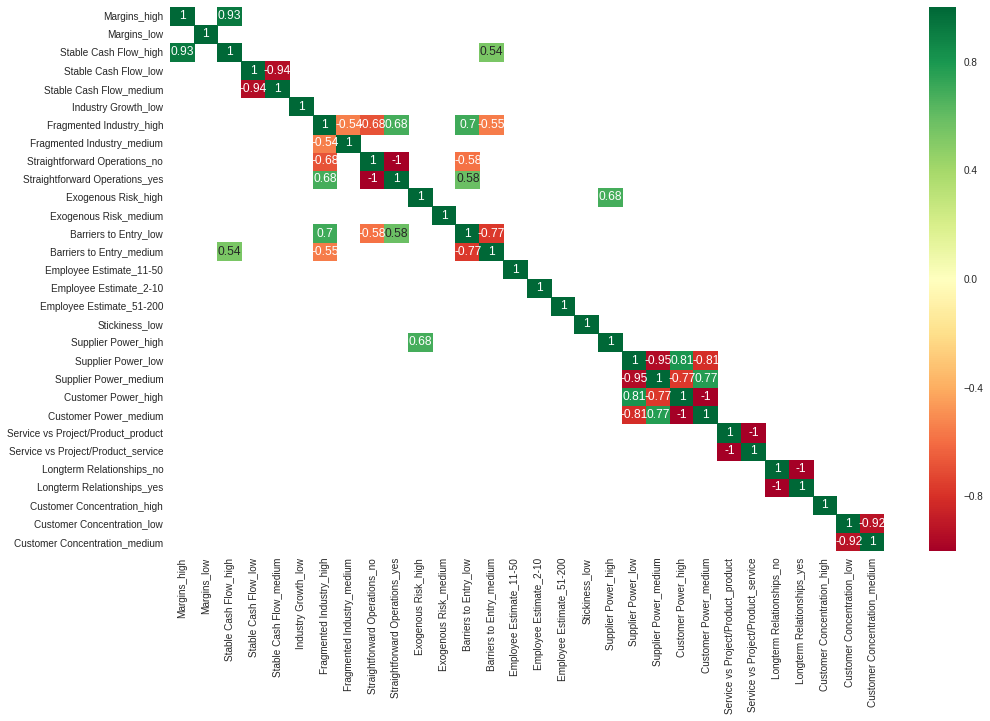

In [0]:
dataCorr = X.corr(method='pearson')
dataCorr = dataCorr[abs(dataCorr)>0.5]
plt.subplots(figsize=(16,10))
sns.heatmap(dataCorr, annot=True, cmap="RdYlGn")
plt.show()

As shown in the heat map above, feature pairs 'Barriers to Entry_high' & 'Straightforward Operations_no', 'Customer Power_high' & 'Supplier Power_low' have positive corrlaton value greater than 0.5, synthetic features are constructed for these pairs using * (multiplication) operator.

On the other hand, feature pairs 'Barriers to Entry_low' & 'Straightforward Operations_no', 'Supplier Power_medium' & 'Customer Power_high'  are negatively correlated with absoluate value of correlation greater than 0.5, synthetic features are constructed using these pairs using - (minus) operator.

{ref: https://pdfs.semanticscholar.org/f0dd/73d16cf7c28ba552d76432304231d04e6046.pdf}

{codeing ref: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas}

In [0]:
#print(X.columns)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr(method='pearson').abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    #au_corr = au_corr[au_corr!=1]
    #Create synthetic features for the top 8 attribute fairs with highest correlation using operator * (multiplication) and - (minus)
    df[au_corr.index[0][0]+'*'+au_corr.index[0][1]] = np.where(( df[au_corr.index[0][0]]* df[au_corr.index[0][1]])>0, 0, 1)
    df[au_corr.index[1][0]+'*'+au_corr.index[1][1]] = np.where(( df[au_corr.index[1][0]]* df[au_corr.index[1][1]])>0, 0, 1)
    df[au_corr.index[2][0]+'*'+au_corr.index[2][1]] = np.where(( df[au_corr.index[2][0]]* df[au_corr.index[2][1]])>0, 0, 1)
    df[au_corr.index[3][0]+'*'+au_corr.index[3][1]] = np.where(( df[au_corr.index[3][0]]* df[au_corr.index[3][1]])>0, 0, 1)
    df[au_corr.index[4][0]+'*'+au_corr.index[4][1]] = np.where(( df[au_corr.index[4][0]]* df[au_corr.index[4][1]])>0, 0, 1)
    df[au_corr.index[5][0]+'*'+au_corr.index[5][1]] = np.where(( df[au_corr.index[5][0]]* df[au_corr.index[5][1]])>0, 0, 1)
    df[au_corr.index[6][0]+'*'+au_corr.index[6][1]] = np.where(( df[au_corr.index[6][0]]* df[au_corr.index[6][1]])>0, 0, 1)
    df[au_corr.index[7][0]+'*'+au_corr.index[7][1]] = np.where(( df[au_corr.index[7][0]]* df[au_corr.index[7][1]])>0, 0, 1)
    #Create synthetic features for the top 8 attribute fairs with highest correlation using operator - (minus)
    df[au_corr.index[0][0]+'-'+au_corr.index[0][1]] = np.where(( df[au_corr.index[0][0]]- df[au_corr.index[0][1]])>0, 0, 1)
    df[au_corr.index[1][0]+'-'+au_corr.index[1][1]] = np.where(( df[au_corr.index[1][0]]- df[au_corr.index[1][1]])>0, 0, 1)
    df[au_corr.index[2][0]+'-'+au_corr.index[2][1]] = np.where(( df[au_corr.index[2][0]]- df[au_corr.index[2][1]])>0, 0, 1)
    df[au_corr.index[3][0]+'-'+au_corr.index[3][1]] = np.where(( df[au_corr.index[3][0]]- df[au_corr.index[3][1]])>0, 0, 1)
    df[au_corr.index[4][0]+'-'+au_corr.index[4][1]] = np.where(( df[au_corr.index[4][0]]- df[au_corr.index[4][1]])>0, 0, 1)
    df[au_corr.index[5][0]+'-'+au_corr.index[5][1]] = np.where(( df[au_corr.index[5][0]]- df[au_corr.index[5][1]])>0, 0, 1)
    df[au_corr.index[6][0]+'-'+au_corr.index[6][1]] = np.where(( df[au_corr.index[6][0]]- df[au_corr.index[6][1]])>0, 0, 1)
    df[au_corr.index[7][0]+'-'+au_corr.index[7][1]] = np.where(( df[au_corr.index[7][0]]- df[au_corr.index[7][1]])>0, 0, 1)
    #drop the top 8 original features with highest correlation
    print(au_corr.index[0][0])
    if au_corr.index[0][0] in df.columns: df.drop(au_corr.index[0][0], axis=1,inplace=True)
    if au_corr.index[1][0] in df.columns: df.drop(au_corr.index[1][0], axis=1,inplace=True)
    if au_corr.index[2][0] in df.columns: df.drop(au_corr.index[2][0], axis=1,inplace=True)
    if au_corr.index[3][0] in df.columns: df.drop(au_corr.index[3][0], axis=1,inplace=True)
    if au_corr.index[4][0] in df.columns: df.drop(au_corr.index[4][0], axis=1,inplace=True)
    if au_corr.index[5][0] in df.columns: df.drop(au_corr.index[5][0], axis=1,inplace=True)
    if au_corr.index[6][0] in df.columns: df.drop(au_corr.index[6][0], axis=1,inplace=True)
    if au_corr.index[7][0] in df.columns: df.drop(au_corr.index[7][0], axis=1,inplace=True)
    if au_corr.index[0][1] in df.columns: df.drop(au_corr.index[0][1], axis=1,inplace=True)
    if au_corr.index[1][1] in df.columns: df.drop(au_corr.index[1][1], axis=1,inplace=True)
    if au_corr.index[2][1] in df.columns: df.drop(au_corr.index[2][1], axis=1,inplace=True)
    if au_corr.index[3][1] in df.columns: df.drop(au_corr.index[3][1], axis=1,inplace=True)
    if au_corr.index[4][1] in df.columns: df.drop(au_corr.index[4][1], axis=1,inplace=True)
    if au_corr.index[5][1] in df.columns: df.drop(au_corr.index[5][1], axis=1,inplace=True)
    if au_corr.index[6][1] in df.columns: df.drop(au_corr.index[6][1], axis=1,inplace=True)
    if au_corr.index[7][1] in df.columns: df.drop(au_corr.index[7][1], axis=1,inplace=True)
    return au_corr[0:n]

#use the print function to view the top correlation pairs
print("Top Absolate Correlations")
print(get_top_abs_correlations(X, 10))

Top Absolate Correlations


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

Longterm Relationships_no
Longterm Relationships_no           Longterm Relationships_yes            1.000000
Straightforward Operations_no       Straightforward Operations_yes        1.000000
Customer Power_high                 Customer Power_medium                 1.000000
Service vs Project/Product_product  Service vs Project/Product_service    1.000000
Supplier Power_low                  Supplier Power_medium                 0.948985
Stable Cash Flow_low                Stable Cash Flow_medium               0.942750
Margins_high                        Stable Cash Flow_high                 0.927591
Customer Concentration_low          Customer Concentration_medium         0.919489
Supplier Power_low                  Customer Power_high                   0.809447
                                    Customer Power_medium                 0.809447
dtype: float64


In [0]:
print(X.columns)
print(X.shape)

Index(['Margins_low', 'Industry Growth_low', 'Fragmented Industry_high',
       'Fragmented Industry_medium', 'Exogenous Risk_high',
       'Exogenous Risk_medium', 'Barriers to Entry_low',
       'Barriers to Entry_medium', 'Employee Estimate_11-50',
       'Employee Estimate_2-10', 'Employee Estimate_51-200', 'Stickiness_low',
       'Supplier Power_high', 'Customer Concentration_high',
       'Longterm Relationships_no*Longterm Relationships_yes',
       'Straightforward Operations_no*Straightforward Operations_yes',
       'Customer Power_high*Customer Power_medium',
       'Service vs Project/Product_product*Service vs Project/Product_service',
       'Supplier Power_low*Supplier Power_medium',
       'Stable Cash Flow_low*Stable Cash Flow_medium',
       'Margins_high*Stable Cash Flow_high',
       'Customer Concentration_low*Customer Concentration_medium',
       'Longterm Relationships_no-Longterm Relationships_yes',
       'Straightforward Operations_no-Straightforward Operati

Recreat the logit model with synthetic features

In [0]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(int),X.astype(int))
#cov_type='HC0' option is required: model.fit(cov_type='HC0') will produce correct standard errors for Poisson with dispersion.
#{ref:https://github.com/statsmodels/statsmodels/issues/3337}
result=logit_model.fit(method='bfgs',cov_type='HC0')  
print(result.summary2())

         Current function value: 0.240928
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                                                    Results: Logit
Model:                                 Logit                              Pseudo R-squared:                   0.652   
Dependent Variable:                    Score                              AIC:                                191.0650
Date:                                  2018-12-03 15:18                   BIC:                                299.2390
No. Observations:                      272                                Log-Likelihood:                     -65.532 
Df Model:                              29                                 LL-Null:                            -188.54 
Df Residuals:                          242                                Scale:                              1.0000  
Converged:                             0.0000                                        

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit the model and calculate accuracy with synthetic features. The accuracy of the Logit model with synthetic features increased from 0.78 to 0.82.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,  
    intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=3,
    penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
    verbose=0, warm_start=False)
logreg.fit(X_train.astype(float), y_train.astype(int))

y_pred = logreg.predict(X_test.astype(float))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  self.C = C


Draw ROC for new model with synthetic features

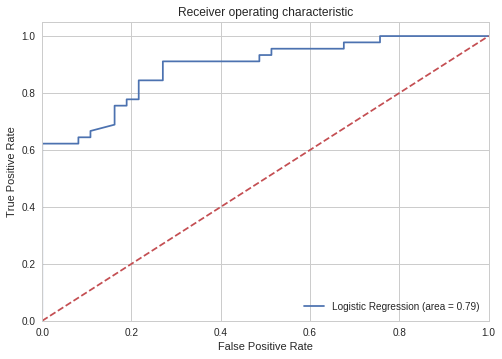

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Apply Principle Component Analysis to reduce feature space dimension after adding synthetic features and get model accuracy again (ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

Use 

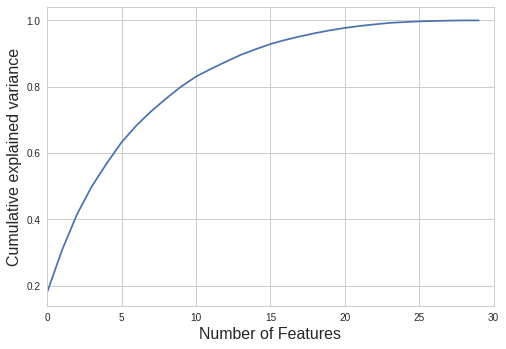

In [0]:
from sklearn.decomposition import PCA

###########################################################################################################################################################
#The Cumulative explained variance shows how much of the variance is captures by the first x features.
#Wth this graph, we can visualize that the first 15 features with the largest correlation already capture more than 90% of the variance.
#If the Regression / Classification model has low accuracy values for your , you could decide to stepwise remove the features with the lowest correlation, 
#(or stepwise add features with the highest correlation).
###########################################################################################################################################################
pca = PCA().fit(X)
var_ratio = pca.explained_variance_ratio_
components = pca.components_
#print(pca.explained_variance_)
plt.plot(np.cumsum(var_ratio))
plt.xlim(0,30,1)
plt.xlabel('Number of Features', fontsize=16)
plt.ylabel('Cumulative explained variance', fontsize=16)
plt.show()

Recreate the model using X_pca (with reduced feature space) and calculate classifier accuracy (ref: https://stackoverflow.com/questions/32860849/classification-pca-and-logistic-regression-using-sklearn).

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

logreg = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,  
    intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=3,
    penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
    verbose=0, warm_start=False)

pipe = Pipeline([('pca', pca), ('logistic', logreg)])
pipe.fit(X_train.astype(float), y_train.astype(int))

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

predictions = pipe.predict(X_test.astype(float))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

original shape:    (272, 30)
transformed shape: (272, 20)
Accuracy of logistic regression classifier on test set: 0.78


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  self.C = C


Draw ROC for new model using PCA feature extraction

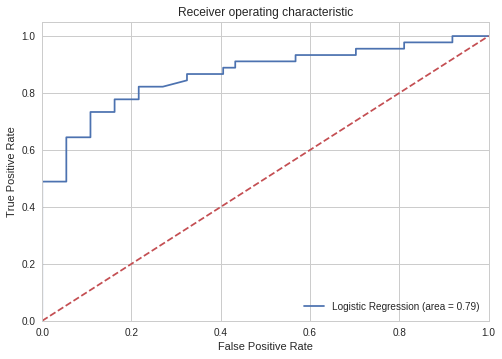

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Note: swap the code below to run models with or without feature reduction and compare classifer accuracy.

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.78


K-Nearest Neighbors, n_neighbors=5

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.78


K-Nearest Neighbors, n_neighbors=15

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.87


Linear Discriminant Analysis

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

ImportError: ignored

Gaussian Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Support Vector Machine

In [0]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Gradient Boosting Classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=1000)
gbc.fit(X_train, y_train)
print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gbc.score(X_train, y_train)))
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gbc.score(X_test, y_test)))

MLP Neural Net

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha = 1)
mlp.fit(X_train, y_train)
print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(mlp.score(X_test, y_test)))

The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of no error made on the test set. However, the test set was very small.

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

With this dataset, accuracy is at the highest when k=5.

In [0]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Tune hyperparameters for GDB (gradient boosting). The best performance for this data set is 0.83, using the combination of n_estimators = 500, learning_rate=0.01, criterion='frie' for model parameters.

In [0]:
GDB_params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.5, 0.1, 0.01, 0.001],
    'criterion': ['friedman_mse', 'mse', 'mae']
}

for n_est in GDB_params['n_estimators']:
    for lr in GDB_params['learning_rate']:
        for crit in GDB_params['criterion']:
            gbc = GradientBoostingClassifier(n_estimators=n_est, 
                                             learning_rate = lr,
                                             criterion = crit)
            gbc.fit(X_train, y_train)
            train_score = gbc.score(X_train, y_train)
            test_score = gbc.score(X_test, y_test)
            print("For ({}, {}, {}) - train, test score: \t {:.5f} \t-\t {:.5f}".format(n_est, lr, crit[:4], train_score, test_score))